In [ ]:
import pandas as pd
import numpy as np
import torch
# Set seed for random
torch.manual_seed(42)
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import torch.nn.functional as F
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import math

In [ ]:
data = pd.read_csv('./data_post_covid.csv', index_col = 'Date')
data

,Open,High,Low,Close,Volume,DX-Y.NYB_Close,CL=F_Close,^VIX_Close,GC=F_Close,MSFT_Close,...,21middle,21lower,14rsv,21rsv,FT_3components,FT_6components,FT_9components,FT_27components,FT_81components,FT_100components
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-04,5.932000,6.016500,5.787000,5.797000,255680000,79.919998,73.139999,26.080000,1062.400024,20.917377,...,6.248762,5.763647,21.630612,17.794448,83.596852,105.502660,101.283516,111.174051,111.090952,111.275050
2010-02-05,5.794000,5.882500,5.705000,5.869500,220496000,80.440002,71.190002,26.110001,1052.199951,21.052624,...,6.213381,5.731172,20.281010,17.497085,83.398979,104.947948,100.395843,108.419804,101.622448,99.675144
2010-02-08,5.969000,6.050000,5.828000,5.841500,197804000,80.300003,71.889999,26.510000,1065.699951,20.827211,...,6.182024,5.692854,16.084298,14.423536,83.201042,104.392242,99.507848,105.656495,92.231059,88.195386
2010-02-09,5.910000,5.954500,5.850000,5.901500,184460000,79.860001,73.750000,26.000000,1076.699951,21.045107,...,6.145143,5.695302,19.948238,18.437731,83.003045,103.835569,98.619608,102.886140,82.977146,76.944542
2010-02-10,5.900000,5.930500,5.800000,5.868000,124664000,80.029999,74.519997,25.400000,1075.800049,21.030079,...,6.114309,5.681808,19.892770,18.990430,82.804988,103.277953,97.731200,100.110761,73.919182,66.027394
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-24,226.940002,229.139999,226.130005,229.050003,15007500,108.260002,70.099998,14.270000,2620.000000,438.450836,...,220.836666,202.592754,64.735975,81.595876,84.585221,108.260431,105.714376,124.739798,157.430199,167.219500
2024-12-26,228.500000,228.500000,226.669998,227.050003,16146700,108.129997,69.620003,14.730000,2638.800049,437.233276,...,222.055714,205.848915,62.371983,82.471506,84.387685,107.711067,104.829461,122.060589,148.500439,156.662792
2024-12-27,225.600006,226.029999,220.899994,223.750000,27367100,108.000000,70.599998,15.950000,2617.199951,429.668457,...,222.812381,207.894857,56.107888,78.919673,84.190079,107.160582,103.943841,119.362466,139.341305,145.686180


In [ ]:
x_pca = StandardScaler().fit_transform(data)
pca = PCA(n_components=.95)
principalComponents = pca.fit_transform(x_pca)

print(f'PCA shape: {principalComponents.shape}')

principalDf = pd.DataFrame(data = principalComponents)


PCA shape: (3752, 8)


In [ ]:
data['y'] = data['Close']

x = data.iloc[:, :42].values
y = data.iloc[:, 42].values

#Split dataset into train (%70), test (%15) and val (%15)
train_x = x[:int(0.7*len(x))]
train_y = y[:int(0.7*len(y))]
test_x = x[int(0.7*len(x)):int(0.85*len(x))]
test_y = y[int(0.7*len(y)):int(0.85*len(y))]
val_x = x[int(0.85*len(x)):]
val_y = y[int(0.85*len(y)):]


print(f'trainX: {train_x.shape} trainY: {train_y.shape}')
print(f'testX: {test_x.shape} testY: {test_y.shape}')
print(f'valX: {val_x.shape} valY: {val_y.shape}')

x_scaler = MinMaxScaler(feature_range = (0, 1))
y_scaler = MinMaxScaler(feature_range = (0, 1))

train_x = x_scaler.fit_transform(train_x)
test_x = x_scaler.transform(test_x)
val_x_scaled = x_scaler.transform(val_x)

train_y = y_scaler.fit_transform(train_y.reshape(-1, 1))
test_y = y_scaler.transform(test_y.reshape(-1, 1))
val_y_scaled = y_scaler.transform(val_y.reshape(-1, 1))


trainX: (2626, 42) trainY: (2626,)
testX: (563, 42) testY: (563,)
valX: (563, 42) valY: (563,)


In [ ]:
def sliding_window(x, y, window):
    x_ = []
    y_ = []
    y_gan = []
    for i in range(window, x.shape[0]):
        tmp_x = x[i - window: i, :]
        tmp_y = y[i]
        tmp_y_gan = y[i - window: i + 1]
        x_.append(tmp_x)
        y_.append(tmp_y)
        y_gan.append(tmp_y_gan)
    x_ = torch.from_numpy(np.array(x_)).float()
    y_ = torch.from_numpy(np.array(y_)).float()
    y_gan = torch.from_numpy(np.array(y_gan)).float()
    return x_, y_, y_gan

train_x_slide, train_y_slide, train_y_gan = sliding_window(train_x, train_y, 3)
val_x_slide, val_y_slide, val_y_gan = sliding_window(val_x_scaled, val_y_scaled, 3)
test_x_slide, test_y_slide, test_y_gan = sliding_window(test_x, test_y, 3)
print(f'train_x: {train_x_slide.shape} train_y: {train_y_slide.shape} train_y_gan: {train_y_gan.shape}')
print(f'test_x: {test_x_slide.shape} test_y: {test_y_slide.shape} test_y_gan: {test_y_gan.shape}')
print(f'val_x: {val_x_slide.shape} val_y: {val_y_slide.shape} val_y_gan: {val_y_gan.shape}')


train_x: torch.Size([2623, 3, 42]) train_y: torch.Size([2623, 1]) train_y_gan: torch.Size([2623, 4, 1])
test_x: torch.Size([560, 3, 42]) test_y: torch.Size([560, 1]) test_y_gan: torch.Size([560, 4, 1])
val_x: torch.Size([560, 3, 42]) val_y: torch.Size([560, 1]) val_y_gan: torch.Size([560, 4, 1])


In [ ]:
class Generator(nn.Module):
    def __init__(self, input_size):
        super().__init__()
        self.lstm_1 = nn.LSTM(input_size, 1024, batch_first=True)
        self.lstm_2 = nn.LSTM(1024, 512, batch_first=True)
        self.lstm_3 = nn.LSTM(512, 256, batch_first=True)
        self.linear_1 = nn.Linear(256, 128)
        self.linear_2 = nn.Linear(128, 64)
        self.linear_3 = nn.Linear(64, 1)
        self.dropout = nn.Dropout(0.2)

    def forward(self, x):
        device = next(self.parameters()).device
        x = x.to(device)

        # Initialize hidden and cell states for LSTM
        h0_1 = torch.zeros(1, x.size(0), 1024).to(device)
        c0_1 = torch.zeros(1, x.size(0), 1024).to(device)
        out_1, (h1, c1) = self.lstm_1(x, (h0_1, c0_1))
        out_1 = self.dropout(out_1)

        h0_2 = torch.zeros(1, x.size(0), 512).to(device)
        c0_2 = torch.zeros(1, x.size(0), 512).to(device)
        out_2, (h2, c2) = self.lstm_2(out_1, (h0_2, c0_2))
        out_2 = self.dropout(out_2)

        h0_3 = torch.zeros(1, x.size(0), 256).to(device)
        c0_3 = torch.zeros(1, x.size(0), 256).to(device)
        out_3, (h3, c3) = self.lstm_3(out_2, (h0_3, c0_3))
        out_3 = self.dropout(out_3)

        # Fully connected layers
        out_4 = self.linear_1(out_3[:, -1, :])
        out_5 = self.linear_2(out_4)
        out_6 = self.linear_3(out_5)
        return out_6

class Discriminator(nn.Module):
    def __init__(self, input_size):
        super().__init__()
        self.conv1 = nn.Conv1d(input_size+1, 32, kernel_size = 5, stride = 1, padding = 'same')
        self.conv2 = nn.Conv1d(32, 64, kernel_size = 5, stride = 1, padding = 'same')
        self.batch = nn.BatchNorm1d(64)
        self.conv3 = nn.Conv1d(64, 128, kernel_size = 5, stride = 1, padding = 'same')
        self.linear1 = nn.Linear(128, 220)
        self.linear2 = nn.Linear(220, 220)
        self.linear3 = nn.Linear(220, 1)
        self.leaky = nn.LeakyReLU(0.01)
        self.relu = nn.ReLU()

    def forward(self, x):
        conv1 = self.leaky(self.conv1(x))
        conv2 = self.leaky(self.conv2(conv1))
        conv2 = self.batch(conv2)
        conv3 = self.leaky(self.conv3(conv2))
        flatten_x =  conv3.reshape(conv3.shape[0], conv3.shape[1])
        out_1 = self.leaky(self.linear1(flatten_x))
        out_2 = self.relu(self.linear2(out_1))
        out = self.linear3(out_2)
        return out

In [ ]:
def compute_gradient_penalty(critic, real_samples, fake_samples, device, lambda_term=5):
    # Create random weight term for interpolation
    batch_size = real_samples.size(0)
    epsilon_shape = [batch_size] + [1] * (real_samples.dim() - 1)
    epsilon = torch.rand(epsilon_shape, device=device)

    # Interpolate between real and fake samples.
    # Note: detach fake_samples to avoid backpropagation to the generator.
    interpolated = epsilon * real_samples + (1 - epsilon) * fake_samples.detach()
    interpolated.requires_grad = True

    # Compute critic output on the interpolated samples.
    interpolated_scores = critic(interpolated)

    # Compute gradients of the critic outputs with respect to the interpolated samples.
    grad_outputs = torch.ones_like(interpolated_scores, device=device)
    gradients = torch.autograd.grad(
        outputs=interpolated_scores,
        inputs=interpolated,
        grad_outputs=grad_outputs,
        create_graph=True,
        retain_graph=True,
        only_inputs=True
    )[0]

    # Flatten gradients per sample and compute their L2 norm.
    gradients = gradients.view(batch_size, -1)
    gradient_norm = gradients.norm(2, dim=1)

    # Compute the gradient penalty as the mean squared difference from 1.
    penalty = lambda_term * ((gradient_norm - 1) ** 2).mean()
    return penalty

In [ ]:
def build_wgan(config):
  use_cuda = 1
  device = torch.device("cuda" if (torch.cuda.is_available() & use_cuda) else "cpu")

  trainDataloader = DataLoader(
      TensorDataset(train_x_slide, train_y_gan),
      batch_size = config["batch_size"],
      shuffle = False
  )

  modelG = Generator(42).to(device)
  modelD = Discriminator(3).to(device)

  optimiserG = torch.optim.Adam(
      modelG.parameters(),
      lr = config["lr"],
      weight_decay = config["weight_decay"]
  )
  optimiserD = torch.optim.Adam(
      modelD.parameters(),
      lr = config["lr"],
      weight_decay = config["weight_decay"]
  )

  histG = np.zeros(config["num_epochs"])
  histD = np.zeros(config["num_epochs"])
  count = 0
  for epoch in range(config["num_epochs"]):
      loss_G = []
      loss_D = []
      for (x, y) in trainDataloader:
          x = x.to(device)
          y = y.to(device)

          # Generate fake samples from the generator.
          fake_data = modelG(x)
          fake_data = torch.cat([y[:, :3, :], fake_data.reshape(-1, 1, 1)], axis=1)

          # Compute critic scores for real and fake data.
          critic_real = modelD(y)
          critic_fake = modelD(fake_data)

          # Compute the Wasserstein loss (without penalty) for the critic.
          lossD = -(torch.mean(critic_real) - torch.mean(critic_fake))

          # Compute the gradient penalty.
          gp = compute_gradient_penalty(modelD, y, fake_data, device, lambda_term=config["lambda_gp"])

          # Total critic loss includes the penalty.
          lossD_total = lossD + gp

          modelD.zero_grad()
          lossD_total.backward(retain_graph=True)
          optimiserD.step()

          # Update generator.
          output_fake = modelD(fake_data)
          lossG = -torch.mean(output_fake)
          modelG.zero_grad()
          lossG.backward()
          optimiserG.step()

          loss_D.append(lossD.item())
          loss_G.append(lossG.item())

      histG[epoch] = sum(loss_G)
      histD[epoch] = sum(loss_D)
      print(f'[{epoch+1}/{config["num_epochs"]}] LossD: {sum(loss_D)} LossG:{sum(loss_G)}')


  return modelG, modelD, histG, histD

In [ ]:
!pip install onnx

In [ ]:
config = {'num_epochs': 10000, 'lr': 2.3027243533728277e-05, 'batch_size': 128, 'weight_decay': 0.00010927817031156595, 'lambda_gp': 1.2398940419223896}
use_cuda = 1
device = torch.device("cuda" if (torch.cuda.is_available() and use_cuda) else "cpu")
# To use the best model:
modelG, modelD, histG, histD = build_wgan(config)


[1/10000] LossD: 0.008530452847480774 LossG:0.9319721274077892
[2/10000] LossD: 0.008611086755990982 LossG:0.9422384686768055
[3/10000] LossD: 0.007910545915365219 LossG:0.9519132822751999
[4/10000] LossD: 0.006642203778028488 LossG:0.9556242190301418
[5/10000] LossD: 0.0034147650003433228 LossG:0.9552975594997406
[6/10000] LossD: -0.0024765431880950928 LossG:0.9517079442739487
[7/10000] LossD: -0.012665007263422012 LossG:0.9447244144976139
[8/10000] LossD: -0.02246745303273201 LossG:0.9325819537043571
[9/10000] LossD: -0.03425709530711174 LossG:0.9193359557539225
[10/10000] LossD: -0.04389931075274944 LossG:0.905437745153904
[11/10000] LossD: -0.05317072942852974 LossG:0.8942636363208294
[12/10000] LossD: -0.060967111960053444 LossG:0.8826365396380424
[13/10000] LossD: -0.06494155526161194 LossG:0.8721894100308418
[14/10000] LossD: -0.06559723801910877 LossG:0.8585632927715778
[15/10000] LossD: -0.058177437633275986 LossG:0.8401696886867285
[16/10000] LossD: -0.05300314072519541 LossG

In [ ]:
# Change the path to include a filename
torch.save(modelG.state_dict(), '/content/drive/MyDrive/Models/modelG_test.pth')
torch.save(modelD.state_dict(), '/content/drive/MyDrive/Models/modelD_test.pth')

In [ ]:
plt.figure(figsize = (12, 6))
plt.plot(histG, color = 'blue', label = 'Generator Loss')
plt.plot(histD, color = 'black', label = 'Discriminator Loss')
plt.title('WGAN-GP Loss')
plt.xlabel('Days')
plt.legend(loc = 'upper right')

In [ ]:

import torch.nn.functional as F

def walk_forward_prediction(config):
  modelG = config["modelG"]
  modelG.eval()

  current_window = train_x_slide[-1].unsqueeze(0).to(device)

  walk_forward_preds = []
  walk_forward_actuals = []

  fine_tune = True
  fine_tune_interval = config["fine_tune_interval"]
  fine_tune_epochs = config["fine_tune_epochs"]
  fine_tune_lr = config["fine_tune_lr"]
  optimizerG_ft = torch.optim.Adam(modelG.parameters(), lr=fine_tune_lr)

  # Walk-forward loop over test samples.
  for i in range(len(test_y)):
      # Generate one-step prediction.
      modelG.eval()
      with torch.no_grad():
          pred = modelG(current_window)
      walk_forward_preds.append(pred.item())
      walk_forward_actuals.append(test_y[i][0])

      # =Fine Tuning Step
      if fine_tune and (i % fine_tune_interval == 0):
          fine_tune_input = current_window
          actual_target = torch.tensor([[test_y[i][0]]], device=device).float()

          modelG.train()
          for epoch in range(fine_tune_epochs):
              optimizerG_ft.zero_grad()
              fine_pred = modelG(fine_tune_input)
              # Compute mean squared error loss between the prediction and the actual target.
              loss_ft = F.mse_loss(fine_pred, actual_target)
              loss_ft.backward()
              optimizerG_ft.step()

          modelG.eval()

      new_obs = torch.tensor(test_x[i]).float().unsqueeze(0).unsqueeze(0).to(device)
      current_window = torch.cat([current_window[:, 1:, :], new_obs], dim=1)

  return modelG, walk_forward_preds, walk_forward_actuals


In [ ]:
modelG_old = modelG

In [ ]:
modelG = modelG_old

In [ ]:
modelG_path = '/content/drive/MyDrive/Models/modelG_new.pth'
use_cuda = 0  =
device = torch.device("cuda" if (torch.cuda.is_available() & use_cuda) else "cpu")

modelG = Generator(42).to(device)
modelG.load_state_dict(torch.load(modelG_path, map_location=torch.device('cpu')))
modelG.eval()
print("Model loaded successfully.")

Model loaded successfully.


GAN_RMSE:3.498918835286134


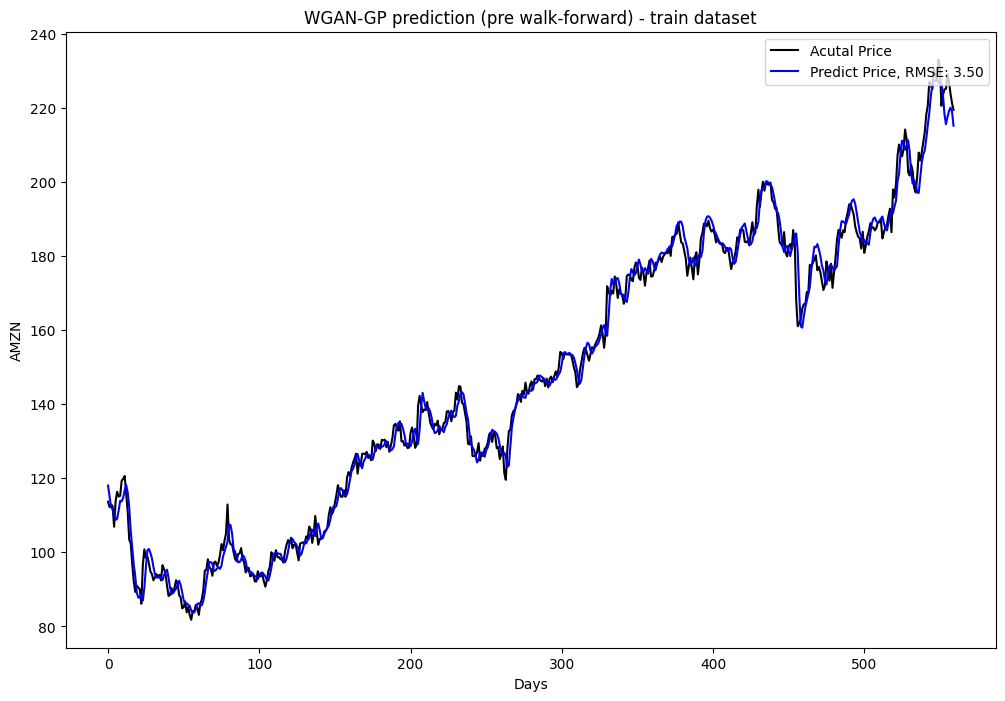

In [ ]:
modelG.eval()
pred_y_val = modelG(val_x_slide.to(device))
y_val_true = y_scaler.inverse_transform(val_y_slide)
y_val_pred = y_scaler.inverse_transform(pred_y_val.cpu().detach().numpy())

MSE = mean_squared_error(y_val_true, y_val_pred)
GAN_RMSE = math.sqrt(MSE)
print(f'GAN_RMSE:{GAN_RMSE}')

plt.figure(figsize=(12, 8))
plt.plot(y_val_true, color = 'black', label = 'Acutal Price')
plt.plot(y_val_pred, color = 'blue', label = f'Predict Price, RMSE: {GAN_RMSE:.2f}')

plt.title('WGAN-GP prediction (pre walk-forward) - train dataset')
plt.ylabel('AMZN')
plt.xlabel('Days')
plt.legend(loc = 'upper right')

In [ ]:
# Define configurable hyperparameters
config = {
    "modelG" : modelG,
    'fine_tune_interval': 8,
    'fine_tune_epochs': 3,
    'fine_tune_lr': 3.5473460423437155e-07
}

modelG, walk_forward_preds, walk_forward_actuals = walk_forward_prediction(config)

Epoch [1/100], Loss: 0.0004
Epoch [2/100], Loss: 0.0001
Epoch [3/100], Loss: 0.0001
Epoch [4/100], Loss: 0.0001
Epoch [5/100], Loss: 0.0001
Epoch [6/100], Loss: 0.0001
Epoch [7/100], Loss: 0.0001
Epoch [8/100], Loss: 0.0001
Epoch [9/100], Loss: 0.0001
Epoch [10/100], Loss: 0.0001
Epoch [11/100], Loss: 0.0000
Epoch [12/100], Loss: 0.0001
Epoch [13/100], Loss: 0.0001
Epoch [14/100], Loss: 0.0001
Epoch [15/100], Loss: 0.0000
Epoch [16/100], Loss: 0.0001
Epoch [17/100], Loss: 0.0000
Epoch [18/100], Loss: 0.0001
Epoch [19/100], Loss: 0.0001
Epoch [20/100], Loss: 0.0001
Epoch [21/100], Loss: 0.0001
Epoch [22/100], Loss: 0.0000
Epoch [23/100], Loss: 0.0001
Epoch [24/100], Loss: 0.0001
Epoch [25/100], Loss: 0.0000
Epoch [26/100], Loss: 0.0001
Epoch [27/100], Loss: 0.0000
Epoch [28/100], Loss: 0.0000
Epoch [29/100], Loss: 0.0000
Epoch [30/100], Loss: 0.0002
Epoch [31/100], Loss: 0.0000
Epoch [32/100], Loss: 0.0000
Epoch [33/100], Loss: 0.0001
Epoch [34/100], Loss: 0.0001
Epoch [35/100], Loss: 0

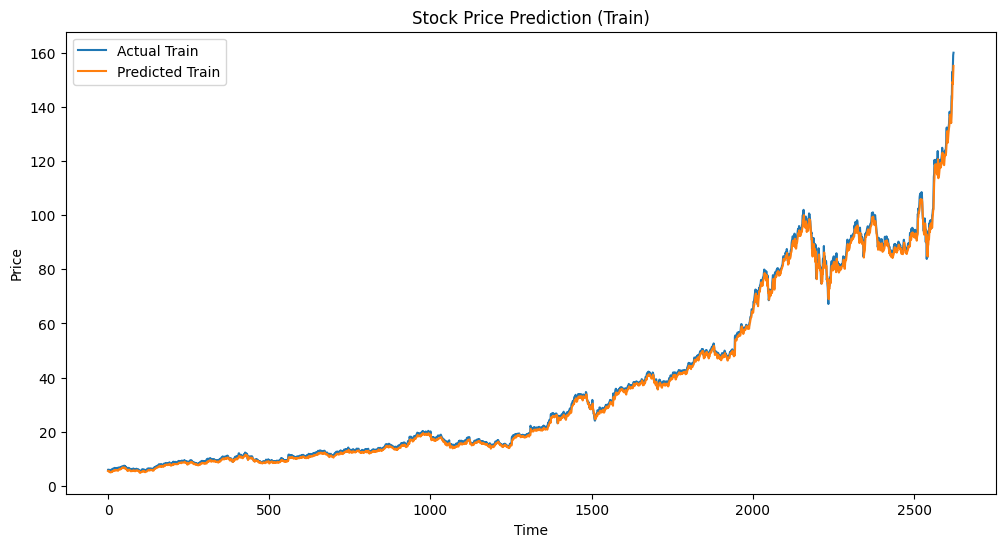

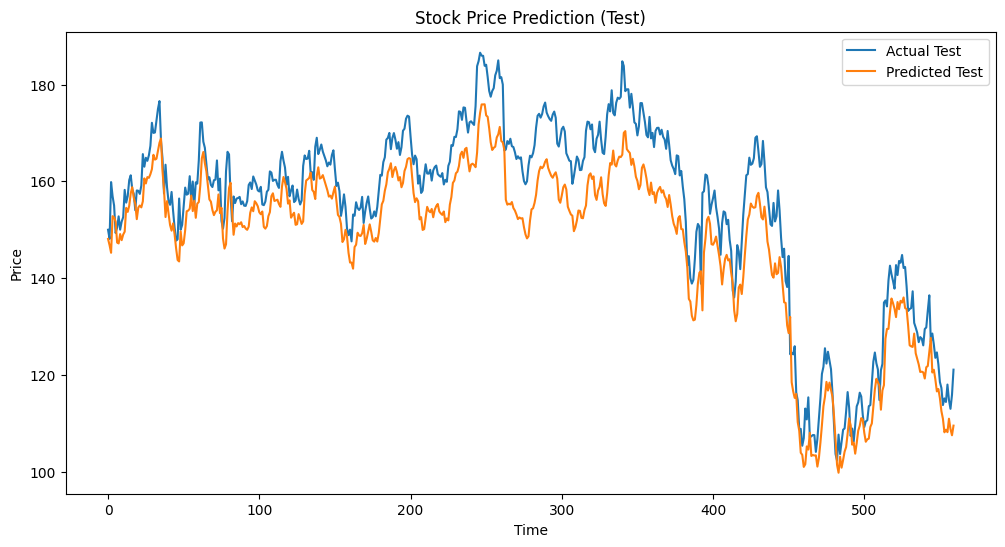

In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import torch.nn.functional as F
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import math
import statsmodels
from statsmodels.tsa.arima.model import ARIMA

class LSTMForecaster(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(LSTMForecaster, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

input_size = train_x_slide.shape[2]
hidden_size = 64
num_layers = 2
output_size = 1

LSTM_model = LSTMForecaster(input_size, hidden_size, num_layers, output_size).to(device)

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(LSTM_model.parameters(), lr=0.0007)

# Training loop
epochs = 100
for epoch in range(epochs):
    LSTM_model.train()
    for i, (inputs, targets) in enumerate(DataLoader(TensorDataset(train_x_slide, train_y_slide), batch_size=32, shuffle=True)):
        inputs = inputs.to(device)
        targets = targets.to(device)
        optimizer.zero_grad()
        outputs = LSTM_model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
    print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

# Evaluation
LSTM_model.eval()
with torch.no_grad():
    train_pred = LSTM_model(train_x_slide.to(device))
    test_pred = LSTM_model(test_x_slide.to(device))
    val_pred = LSTM_model(val_x_slide.to(device))


train_pred = y_scaler.inverse_transform(train_pred.cpu().numpy())
test_pred = y_scaler.inverse_transform(test_pred.cpu().numpy())
val_pred = y_scaler.inverse_transform(val_pred.cpu().numpy())

train_y_true = y_scaler.inverse_transform(train_y_slide.cpu().numpy())
test_y_true = y_scaler.inverse_transform(test_y_slide.cpu().numpy())
val_y_true = y_scaler.inverse_transform(val_y_slide.cpu().numpy())


train_rmse = np.sqrt(mean_squared_error(train_y_true, train_pred))
test_rmse = np.sqrt(mean_squared_error(test_y_true, test_pred))
val_rmse = np.sqrt(mean_squared_error(val_y_true, val_pred))

print(f"Train RMSE: {train_rmse:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")
print(f"Validation RMSE: {val_rmse:.4f}")


# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(train_y_true, label='Actual Train')
plt.plot(train_pred, label='Predicted Train')
plt.title('Stock Price Prediction (Train)')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


plt.figure(figsize=(12, 6))
plt.plot(test_y_true, label='Actual Test')
plt.plot(test_pred, label='Predicted Test')
plt.title('Stock Price Prediction (Test)')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()




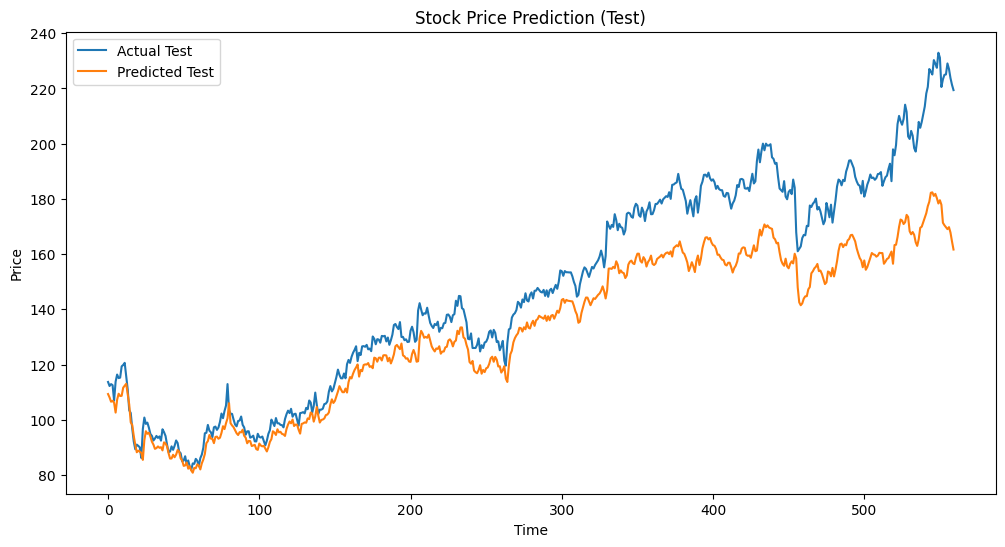

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(val_y_true, label='Actual Test')
plt.plot(val_pred, label='Predicted Test')
plt.title('Stock Price Prediction (Test)')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
import statsmodels
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import math

y_train_true = y_scaler.inverse_transform(train_y_slide)
y_val_true = y_scaler.inverse_transform(val_y_slide)
train = y_train_true
test = y_val_true
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(1,0,1))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)

error = mean_squared_error(test, predictions)
RMSE = math.sqrt(error)
print('Test RMSE: %.3f' % RMSE)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


Test RMSE: 3.514


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score

mae = mean_absolute_error(test, predictions)
print("MAE:", mae)
mape = mean_absolute_percentage_error(test, predictions) *100
print("MAPE:", mape, "%")
r2 = r2_score(test, predictions)
print("R-squared:", r2)

print('Test RMSE: %.3f' % RMSE)

# GAN r2
r2_gan = r2_score(y_val_true, y_val_pred)
print(f'GAN_R2:{r2_gan}')

import numpy as np
from sklearn.metrics import r2_score

def adjusted_r2(r2, n, k):
    """
    Calculates the adjusted R-squared.

    Args:
        r2: The R-squared value.
        n: The number of observations (sample size).
        k: The number of predictor variables.

    Returns:
        The adjusted R-squared value.
    """
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))

n = len(test)
k = test_x.shape[1]
adjusted_r2_value = adjusted_r2(r2, n, k)

print("Adjusted R-squared:", adjusted_r2_value)

n_gan = len(y_val_true)
k_gan = val_x.shape[1]
adjusted_r2_gan = adjusted_r2(r2_gan, n_gan, k_gan)
print("GAN Adjusted R-squared:", adjusted_r2_gan)


MAE: 2.240356284628127
MAPE: 1.6045497949881988 %
R-squared: 0.9917472390936249
Test RMSE: 3.514
GAN_R2:0.9918164484296761
Adjusted R-squared: 0.991076802037401
GAN Adjusted R-squared: 0.9911516337953364


In [ ]:
modelG.eval()
pred_y_train = modelG(train_x_slide.to(device))
pred_y_test = modelG(test_x_slide.to(device))
pred_y_val = modelG(val_x_slide.to(device))

y_train_true = y_scaler.inverse_transform(train_y_slide)
y_train_pred = y_scaler.inverse_transform(pred_y_train.cpu().detach().numpy())

y_test_true = y_scaler.inverse_transform(test_y_slide)
y_test_pred = y_scaler.inverse_transform(pred_y_test.cpu().detach().numpy())

y_val_true = y_scaler.inverse_transform(val_y_slide)
y_val_pred = y_scaler.inverse_transform(pred_y_val.cpu().detach().numpy())

In [ ]:

modelG.eval()
with torch.no_grad():
    y_val_pred_gan = modelG(val_x_slide.to(device))
y_val_pred_gan = y_scaler.inverse_transform(y_val_pred_gan.cpu().numpy())
y_val_true_gan = y_scaler.inverse_transform(val_y_slide.cpu().numpy())


LSTM_model.eval()
with torch.no_grad():
    y_val_pred_lstm = LSTM_model(val_x_slide.to(device))
y_val_pred_lstm = y_scaler.inverse_transform(y_val_pred_lstm.cpu().numpy())
y_val_true_lstm = y_val_true_gan

y_val_pred_arima = np.array(predictions)
y_val_true_arima = y_val_true

NameError: name 'LSTM_model' is not defined

In [ ]:
y_val_pred_arima = np.array(predictions)
y_val_true_arima = y_val_true

def mape(y_true, y_pred):
    """Calculate Mean Absolute Percentage Error (MAPE)."""
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def mae(y_true, y_pred):
    """Calculate Mean Absolute Error (MAE)."""
    return np.mean(np.abs(y_true - y_pred))


arima_mape = mape(y_val_true, y_val_pred_arima)
arima_rmse = RMSE
arima_mae = mae(y_val_true, y_val_pred_arima)

print(f"ARIMA: MAPE = {arima_mape:.2f}%, RMSE = {arima_rmse:.2f}, MAE = {arima_mae:.2f}")

ARIMA: MAPE = 32.68%, RMSE = 3.51, MAE = 44.26


In [ ]:

def mape(y_true, y_pred):
    """Calculate Mean Absolute Percentage Error (MAPE)."""
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def mae(y_true, y_pred):
    """Calculate Mean Absolute Error (MAE)."""
    return np.mean(np.abs(y_true - y_pred))


# Calculate metrics for GAN (pre-COVID)
gan_pre_covid_mape = mape(y_val_true, y_val_pred_gan)
gan_pre_covid_rmse = np.sqrt(mean_squared_error(y_val_true, y_val_pred_gan))
gan_pre_covid_mae = mae(y_val_true, y_val_pred_gan)

print(f"GAN (Pre-COVID): MAPE = {gan_pre_covid_mape:.2f}%, RMSE = {gan_pre_covid_rmse:.2f}, MAE = {gan_pre_covid_mae:.2f}")

gan_post_covid_mape = mape(y_val_true, y_val_pred)
gan_post_covid_rmse = np.sqrt(mean_squared_error(y_val_true, y_val_pred))
gan_post_covid_mae = mae(y_val_true, y_val_pred)

print(f"GAN (Post-COVID): MAPE = {gan_post_covid_mape:.2f}%, RMSE = {gan_post_covid_rmse:.2f}, MAE = {gan_post_covid_mae:.2f}")


# Calculate metrics for ARIMA
arima_mape = mape(y_val_true, y_val_pred_arima)
arima_rmse = RMSE
arima_mae = mae(y_val_true, y_val_pred_arima)

print(f"ARIMA: MAPE = {arima_mape:.2f}%, RMSE = {arima_rmse:.2f}, MAE = {arima_mae:.2f}")


lstm_mape = mape(val_y_true, y_val_pred_lstm)
lstm_rmse = val_rmse
lstm_mae = mae(val_y_true, y_val_pred_lstm)

print(f"LSTM: MAPE = {lstm_mape:.2f}%, RMSE = {lstm_rmse:.2f}, MAE = {lstm_mae:.2f}")


GAN (Pre-COVID): MAPE = 1.84%, RMSE = 3.50, MAE = 2.60
GAN (Post-COVID): MAPE = 1.84%, RMSE = 3.50, MAE = 2.60
ARIMA: MAPE = 32.68%, RMSE = 3.51, MAE = 44.26
LSTM: MAPE = 8.87%, RMSE = 19.15, MAE = 14.93


/usr/local/lib/python3.11/dist-packages/shap/explainers/_deep/deep_pytorch.py:255: UserWarning: unrecognized nn.Module: LSTM
  warnings.warn(f"unrecognized nn.Module: {module_type}")


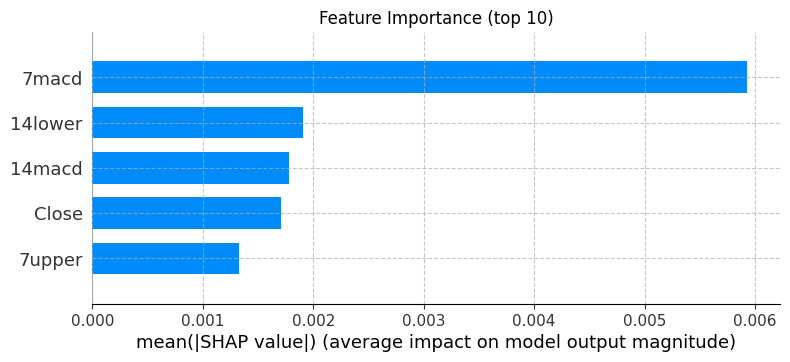

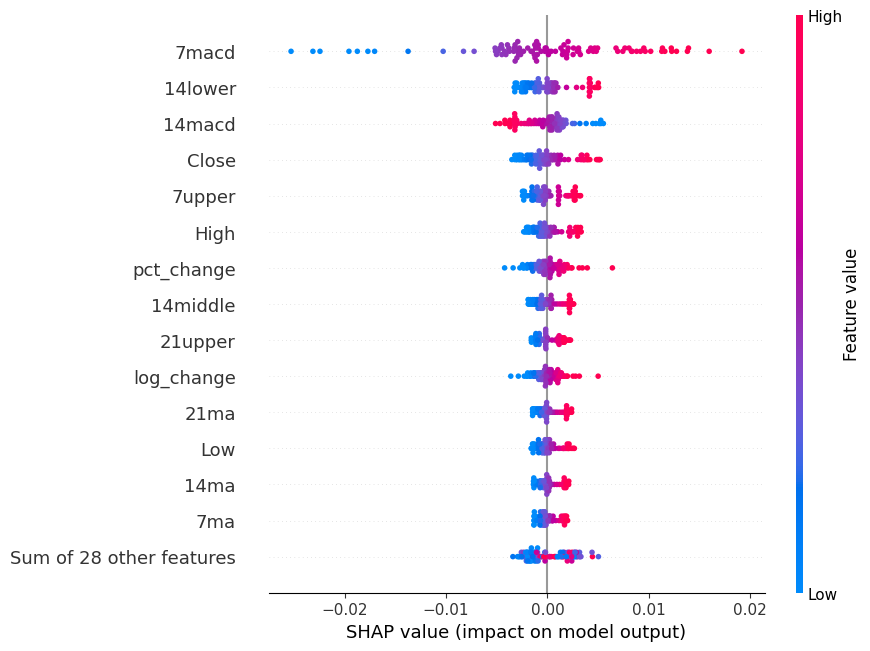

/usr/local/lib/python3.11/dist-packages/shap/explainers/_deep/deep_pytorch.py:255: UserWarning: unrecognized nn.Module: LSTM
  warnings.warn(f"unrecognized nn.Module: {module_type}")


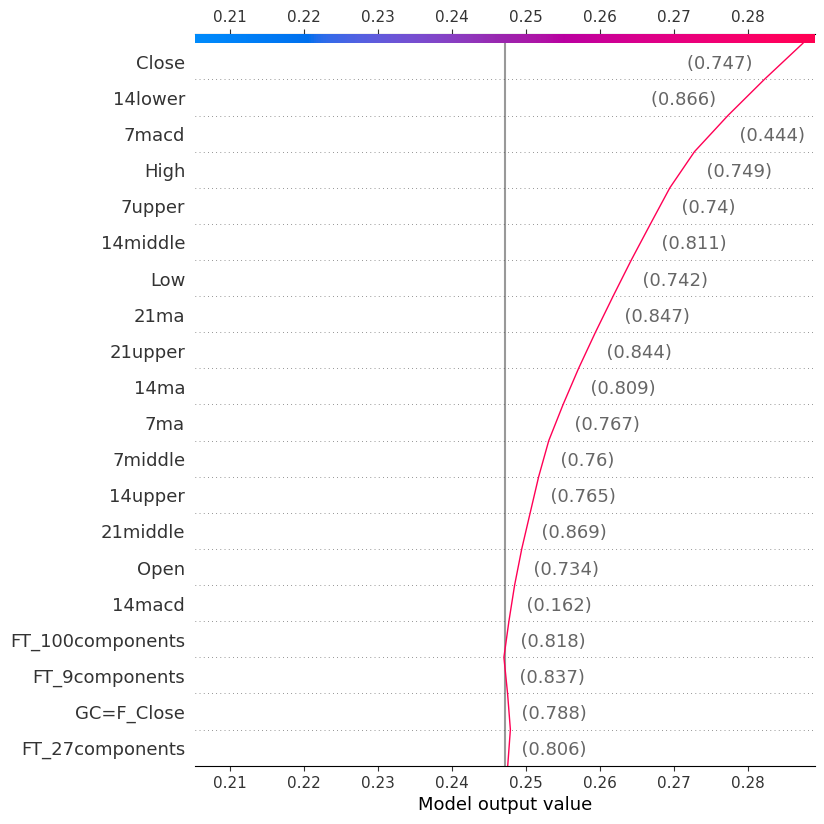

In [ ]:
import shap
import torch

background_data = val_x_slide[:100, 0, :].unsqueeze(1)

explainer = shap.DeepExplainer(modelG, background_data)
feature_names = data.columns[:-1].tolist()

shap_values = explainer.shap_values(val_x_slide[:100, 0, :].unsqueeze(1))

shap_values_reshaped = np.mean(shap_values, axis=(1, 3))


# Plot feature importance
shap.summary_plot(
    shap_values_reshaped,
    val_x_slide[:100, 0, :].cpu().numpy(),
    plot_type='bar',
    max_display=5,
    feature_names=feature_names,  # Add this line
    show = False
)

plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.title('Feature Importance (top 10)')
plt.show()
shap.plots.beeswarm(
    shap.Explanation(shap_values_reshaped,
                     data=val_x_slide[:100, 0, :].cpu().numpy(),
                     feature_names=feature_names),
     max_display=15)

instance_index = 0
instance = val_x_slide[instance_index, 0, :].cpu().numpy()


instance_tensor = torch.tensor(instance, dtype=torch.float32).unsqueeze(0).unsqueeze(0)
shap_values_instance = explainer.shap_values(instance_tensor)

shap_values_instance = shap_values_instance[0][0][:,0]


# Create the decision plot
shap.decision_plot(
    explainer.expected_value[0],
    shap_values_instance,
    features=instance,
    feature_names=feature_names
)

plt.show()

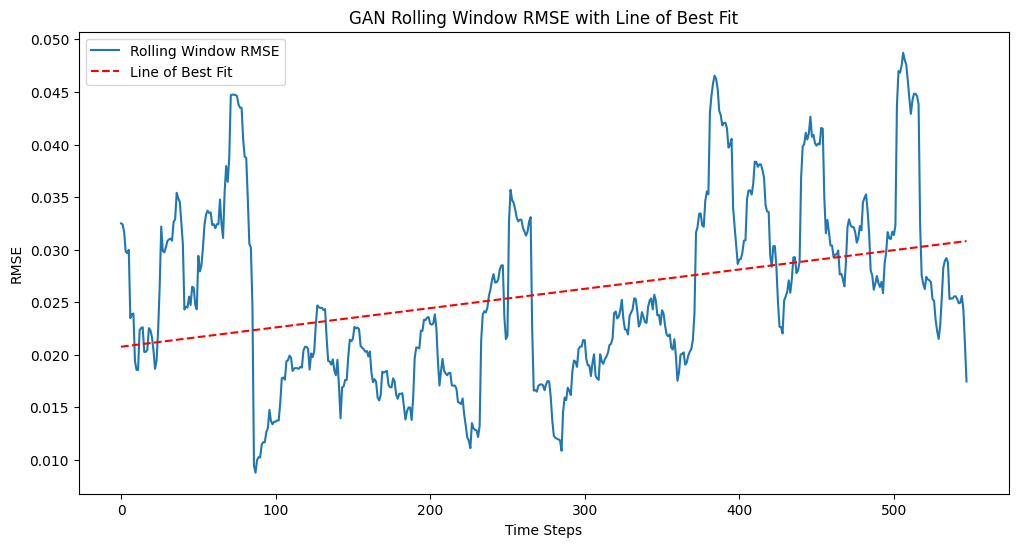

In [ ]:
walk_forward_preds = np.array(walk_forward_preds)
walk_forward_actuals = np.array(walk_forward_actuals)

# Calculate rolling window metrics
window_size = 15
rolling_rmse = []
for i in range(window_size, len(walk_forward_preds)):
    rmse = np.sqrt(mean_squared_error(walk_forward_actuals[i-window_size:i], walk_forward_preds[i-window_size:i]))
    rolling_rmse.append(rmse)


# Linear Regression Line of Best Fit
z = np.polyfit(range(len(rolling_rmse)), rolling_rmse, 1)
p = np.poly1d(z)

plt.figure(figsize=(12, 6))
plt.plot(rolling_rmse, label='Rolling Window RMSE')
plt.plot(p(range(len(rolling_rmse))), "r--", label='Line of Best Fit')

plt.xlabel('Time Steps')
plt.ylabel('RMSE')
plt.title('GAN Rolling Window RMSE with Line of Best Fit')
plt.legend()
plt.show()


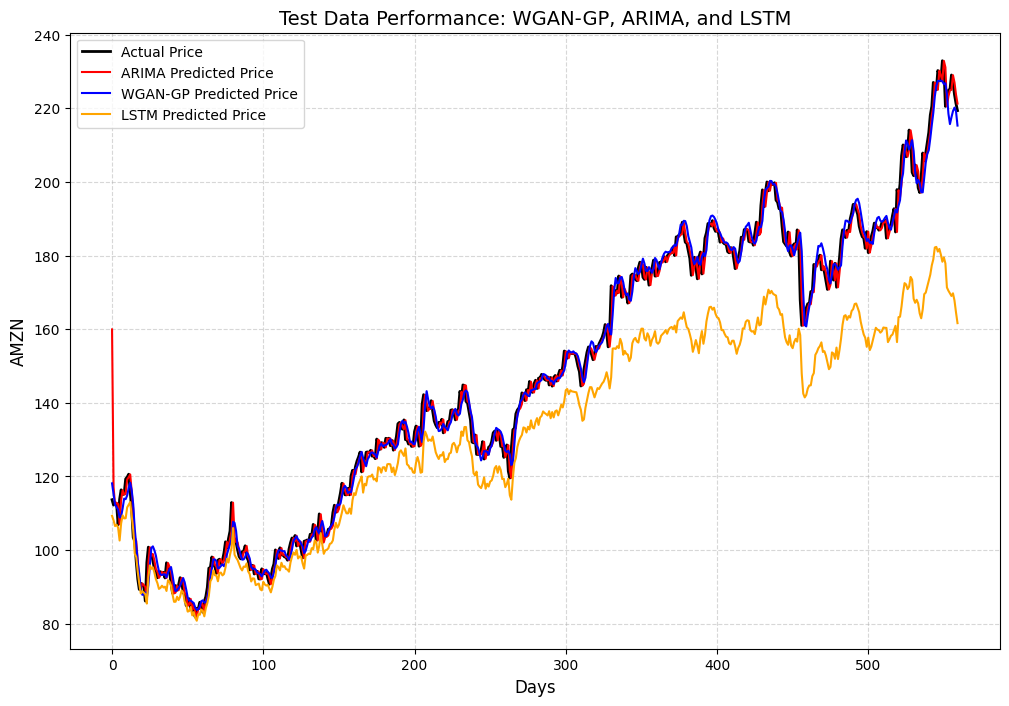

In [ ]:

plt.figure(figsize=(12, 8))

plt.plot(y_val_true, color='black', linestyle='-', linewidth=2, label='Actual Price')
plt.plot(predictions, color='red', linestyle='-', label=f'ARIMA Predicted Price')
plt.plot(y_val_pred, color='blue', linestyle='-', label=f'WGAN-GP Predicted Price')
plt.plot(y_val_pred_lstm, color='orange', linestyle='-',  label='LSTM Predicted Price')
plt.grid(True, linestyle='--', alpha=0.5)

plt.title('Test Data Performance: WGAN-GP, ARIMA, and LSTM', fontsize=14)
plt.ylabel('AMZN', fontsize=12)
plt.xlabel('Days', fontsize=12)
plt.legend(loc='upper left')

plt.show()

GAN_RMSE:4.157930137647359
GAN_RMSE:3.49774950812414


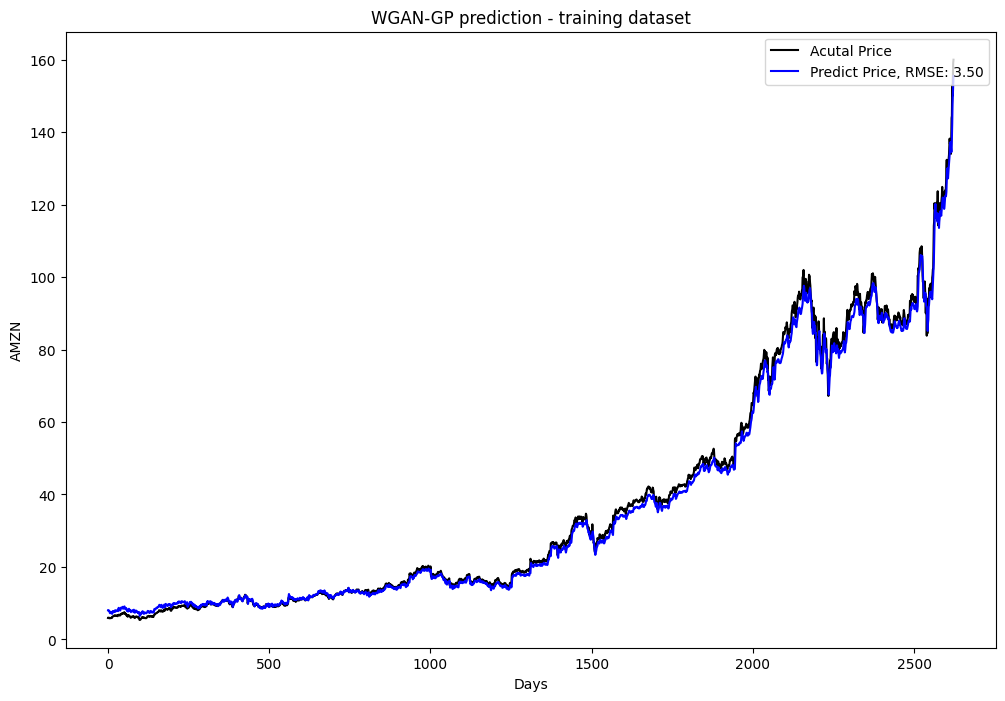

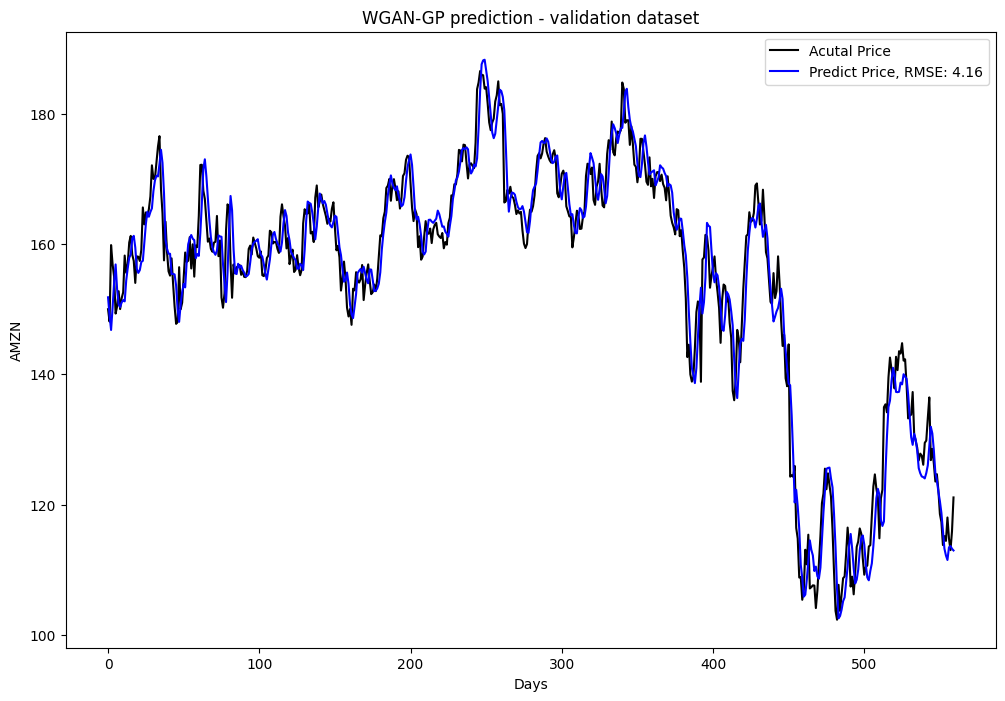

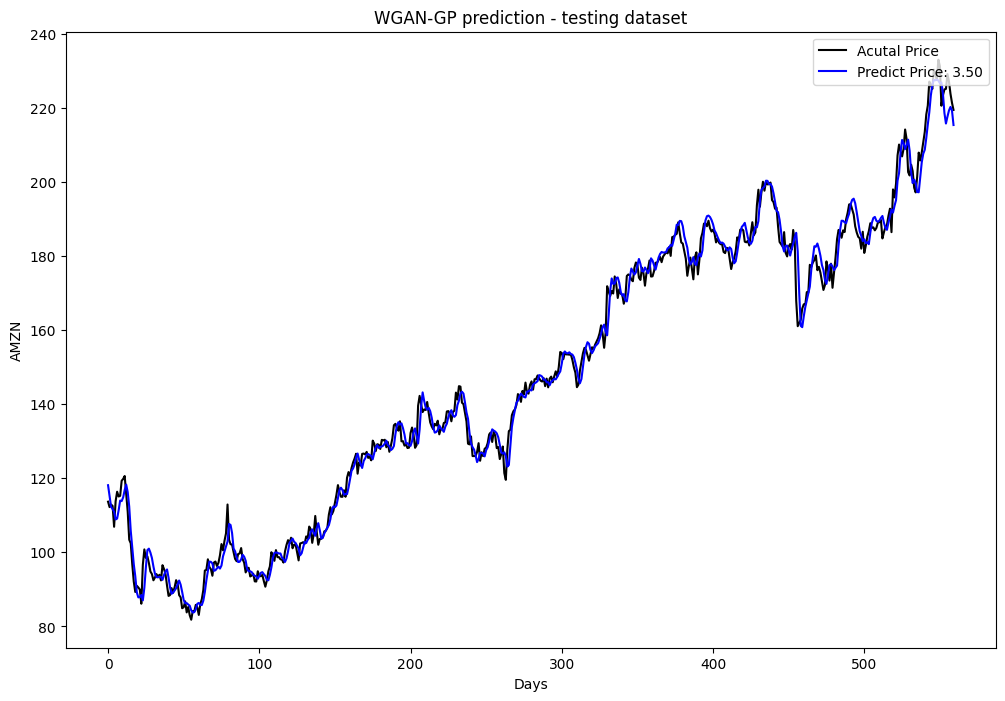

In [ ]:
# Training Graph
MSE = mean_squared_error(y_train_true, y_train_pred)
RMSE = math.sqrt(MSE)

plt.figure(figsize=(12, 8))
plt.plot(y_train_true, color = 'black', label = 'Acutal Price')
plt.plot(y_train_pred, color = 'blue', label = f'Predict Price, RMSE: {GAN_RMSE:.2f}')
plt.title('WGAN-GP prediction - training dataset')
plt.ylabel('AMZN')
plt.xlabel('Days')
plt.legend(loc = 'upper right')

# Validation Graph
MSE = mean_squared_error(y_test_true, y_test_pred)
GAN_RMSE = math.sqrt(MSE)
print(f'GAN_RMSE:{GAN_RMSE}')

plt.figure(figsize=(12, 8))
plt.plot(y_test_true, color = 'black', label = 'Acutal Price')
plt.plot(y_test_pred, color = 'blue', label = f'Predict Price, RMSE: {GAN_RMSE:.2f}')

plt.title('WGAN-GP prediction - validation dataset')
plt.ylabel('AMZN')
plt.xlabel('Days')
plt.legend(loc = 'upper right')

# Testing Graph
MSE = mean_squared_error(y_val_true, y_val_pred)
GAN_RMSE = math.sqrt(MSE)
print(f'GAN_RMSE:{GAN_RMSE}')

plt.figure(figsize=(12, 8))
plt.plot(y_val_true, color = 'black', label = 'Acutal Price')
plt.plot(y_val_pred, color = 'blue', label = f'Predict Price: {GAN_RMSE:.2f}')

plt.title('WGAN-GP prediction - testing dataset')
plt.ylabel('AMZN')
plt.xlabel('Days')
plt.legend(loc = 'upper right')

In [ ]:
data = pd.read_csv('./data_post_covid.csv', index_col = 'Date')

data['y'] = data['Close']

x = data.iloc[:, :42].values
y = data.iloc[:, 42].values

#Split dataset into train (%70), test (%15) and val (%15)
train_x = x[:int(0.7*len(x))]
train_y = y[:int(0.7*len(y))]
test_x = x[int(0.7*len(x)):int(0.85*len(x))]
test_y = y[int(0.7*len(y)):int(0.85*len(y))]
val_x = x[int(0.85*len(x)):]
val_y = y[int(0.85*len(y)):]


print(f'trainX: {train_x.shape} trainY: {train_y.shape}')
print(f'testX: {test_x.shape} testY: {test_y.shape}')
print(f'valX: {val_x.shape} valY: {val_y.shape}')

x_scaler = MinMaxScaler(feature_range = (0, 1))
y_scaler = MinMaxScaler(feature_range = (0, 1))

train_x = x_scaler.fit_transform(train_x)
test_x = x_scaler.transform(test_x)
val_x_scaled = x_scaler.transform(val_x)

train_y = y_scaler.fit_transform(train_y.reshape(-1, 1))
test_y = y_scaler.transform(test_y.reshape(-1, 1))
val_y_scaled = y_scaler.transform(val_y.reshape(-1, 1))


trainX: (2626, 42) trainY: (2626,)
testX: (563, 42) testY: (563,)
valX: (563, 42) valY: (563,)


In [ ]:
modelG = walk_forward_prediction(config)

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu!

In [ ]:
modelG.eval()
pred_y_train = modelG(train_x_slide.to(device))
pred_y_test = modelG(test_x_slide.to(device))
pred_y_val = modelG(val_x_slide.to(device))

y_train_true = y_scaler.inverse_transform(train_y_slide)
y_train_pred = y_scaler.inverse_transform(pred_y_train.cpu().detach().numpy())

y_test_true = y_scaler.inverse_transform(test_y_slide)
y_test_pred = y_scaler.inverse_transform(pred_y_test.cpu().detach().numpy())

y_val_true = y_scaler.inverse_transform(val_y_slide)
y_val_pred = y_scaler.inverse_transform(pred_y_val.cpu().detach().numpy())

In [ ]:
# Training Graph
MSE = mean_squared_error(y_train_true, y_train_pred)
RMSE = math.sqrt(MSE)

plt.figure(figsize=(12, 8))
plt.plot(y_train_true, color = 'black', label = 'Acutal Price')
plt.plot(y_train_pred, color = 'blue', label = f'Predict Price, RMSE: {GAN_RMSE}')
plt.title('WGAN-GP prediction - training dataset')
plt.ylabel('AMZN')
plt.xlabel('Days')
plt.legend(loc = 'upper right')

# Validation Graph
MSE = mean_squared_error(y_test_true, y_test_pred)
GAN_RMSE = math.sqrt(MSE)
print(f'GAN_RMSE:{GAN_RMSE}')

plt.figure(figsize=(12, 8))
plt.plot(y_test_true, color = 'black', label = 'Acutal Price')
plt.plot(y_test_pred, color = 'blue', label = f'Predict Price, RMSE: {GAN_RMSE}')

plt.title('WGAN-GP prediction - validation dataset')
plt.ylabel('AMZN')
plt.xlabel('Days')
plt.legend(loc = 'upper right')

# Testing Graph
MSE = mean_squared_error(y_val_true, y_val_pred)
GAN_RMSE = math.sqrt(MSE)
print(f'GAN_RMSE:{GAN_RMSE}')

plt.figure(figsize=(12, 8))
plt.plot(y_val_true, color = 'black', label = 'Acutal Price')
plt.plot(y_val_pred, color = 'blue', label = f'Predict Price: {GAN_RMSE}')

plt.title('WGAN-GP prediction - testing dataset')
plt.ylabel('AMZN')
plt.xlabel('Days')
plt.legend(loc = 'upper right')

In [ ]:
modelG = walk_forward_prediction(config)

modelG_old.eval()
pred_y_train = modelG_old(train_x_slide.to(device))
pred_y_test = modelG_old(test_x_slide.to(device))
pred_y_val = modelG_old(val_x_slide.to(device))

y_train_true = y_scaler.inverse_transform(train_y_slide)
y_train_pred = y_scaler.inverse_transform(pred_y_train.cpu().detach().numpy())

y_test_true = y_scaler.inverse_transform(test_y_slide)
y_test_pred = y_scaler.inverse_transform(pred_y_test.cpu().detach().numpy())

y_val_true = y_scaler.inverse_transform(val_y_slide)
y_val_pred = y_scaler.inverse_transform(pred_y_val.cpu().detach().numpy())

# Training Graph
MSE = mean_squared_error(y_train_true, y_train_pred)
RMSE = math.sqrt(MSE)

plt.figure(figsize=(12, 8))
plt.plot(y_train_true, color = 'black', label = 'Acutal Price')
plt.plot(y_train_pred, color = 'blue', label = 'Predict Price, RMSE: {GAN_RMSE}')
plt.title('WGAN-GP prediction - training dataset')
plt.ylabel('AMZN')
plt.xlabel('Days')
plt.legend(loc = 'upper right')

# Validation Graph
MSE = mean_squared_error(y_test_true, y_test_pred)
GAN_RMSE = math.sqrt(MSE)
print(f'GAN_RMSE:{GAN_RMSE}')

plt.figure(figsize=(12, 8))
plt.plot(y_test_true, color = 'black', label = 'Acutal Price')
plt.plot(y_test_pred, color = 'blue', label = f'Predict Price, RMSE: {GAN_RMSE}')

plt.title('WGAN-GP prediction - validation dataset')
plt.ylabel('AMZN')
plt.xlabel('Days')
plt.legend(loc = 'upper right')

# Testing Graph
MSE = mean_squared_error(y_val_true, y_val_pred)
GAN_RMSE = math.sqrt(MSE)
print(f'GAN_RMSE:{GAN_RMSE}')

plt.figure(figsize=(12, 8))
plt.plot(y_val_true, color = 'black', label = 'Acutal Price')
plt.plot(y_val_pred, color = 'blue', label = f'Predict Price: {GAN_RMSE}')

plt.title('WGAN-GP prediction - testing dataset')
plt.ylabel('AMZN')
plt.xlabel('Days')
plt.legend(loc = 'upper right')